In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [301]:
total_images_train_normal = os.listdir('../input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL')
total_images_train_pneumonia = os.listdir('../input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

In [302]:
len(total_images_train_normal)

1342

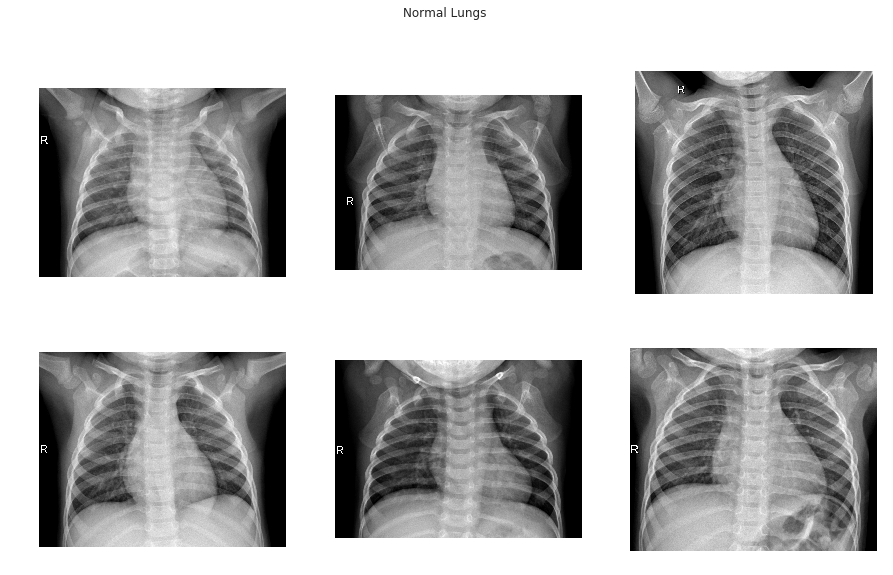

In [303]:
sample_normal = random.sample(total_images_train_normal,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Lungs')
plt.show()

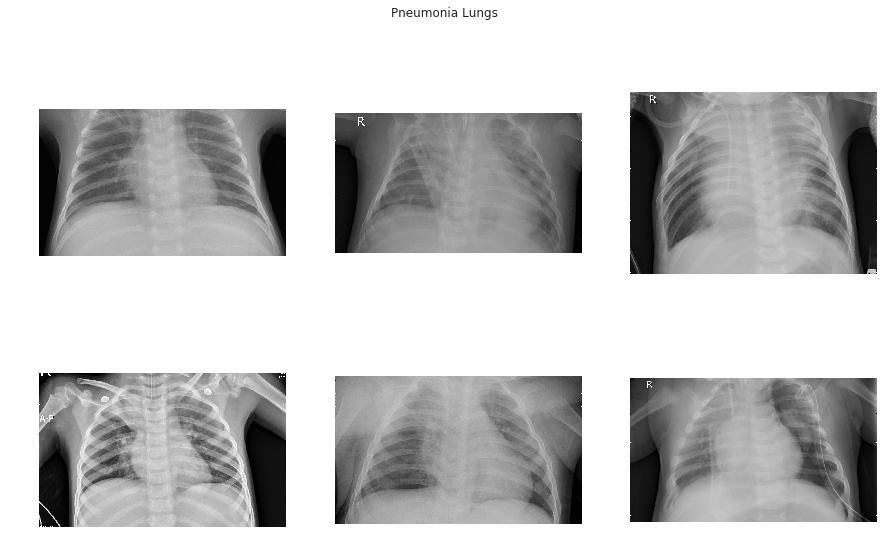

In [304]:
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('../input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/'+sample_pneumonia[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Pneumonia Lungs')
plt.show()

In [305]:
random.sample(total_images_train_normal, 10)

['NORMAL2-IM-0482-0001.jpeg',
 'IM-0485-0001.jpeg',
 'IM-0216-0001.jpeg',
 'NORMAL2-IM-1170-0001.jpeg',
 'NORMAL2-IM-0641-0001.jpeg',
 'IM-0631-0001.jpeg',
 'NORMAL2-IM-1262-0001.jpeg',
 'IM-0476-0001.jpeg',
 'NORMAL2-IM-1089-0001.jpeg',
 'NORMAL2-IM-1064-0001.jpeg']

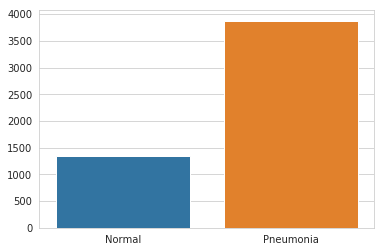

In [306]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

In [307]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 20

In [308]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [309]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 34, 34, 64)       

In [310]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   , validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [311]:
train_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/train',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary', subset='training')
val_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/train',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary', subset='validation')
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/test',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [312]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [313]:
history = model.fit_generator(train_set,
                    steps_per_epoch=train_set.samples//batch_size,
                    epochs=no_of_epochs,
                    validation_data=val_set,
                    validation_steps=val_set.samples//batch_size,
                    callbacks=callbacks
                   )

Train for 417 steps, validate for 104 steps
Epoch 1/20
417/417 [==============================] - 83s 200ms/step - loss: 0.5275 - accuracy: 0.7668 - val_loss: 0.3380 - val_accuracy: 0.8269
Epoch 2/20
417/417 [==============================] - 82s 197ms/step - loss: 0.3287 - accuracy: 0.8619 - val_loss: 0.3058 - val_accuracy: 0.8702
Epoch 3/20
417/417 [==============================] - 81s 194ms/step - loss: 0.2878 - accuracy: 0.8852 - val_loss: 0.2501 - val_accuracy: 0.8846
Epoch 4/20
417/417 [==============================] - 82s 196ms/step - loss: 0.2440 - accuracy: 0.9020 - val_loss: 0.2563 - val_accuracy: 0.8962
Epoch 5/20
417/417 [==============================] - 81s 194ms/step - loss: 0.2202 - accuracy: 0.9135 - val_loss: 0.2240 - val_accuracy: 0.8971
Epoch 6/20
417/417 [==============================] - 81s 194ms/step - loss: 0.2026 - accuracy: 0.9186 - val_loss: 0.2826 - val_accuracy: 0.8817
Epoch 7/20
417/417 [==============================] - 82s 196ms/step - loss: 0.1886 - 

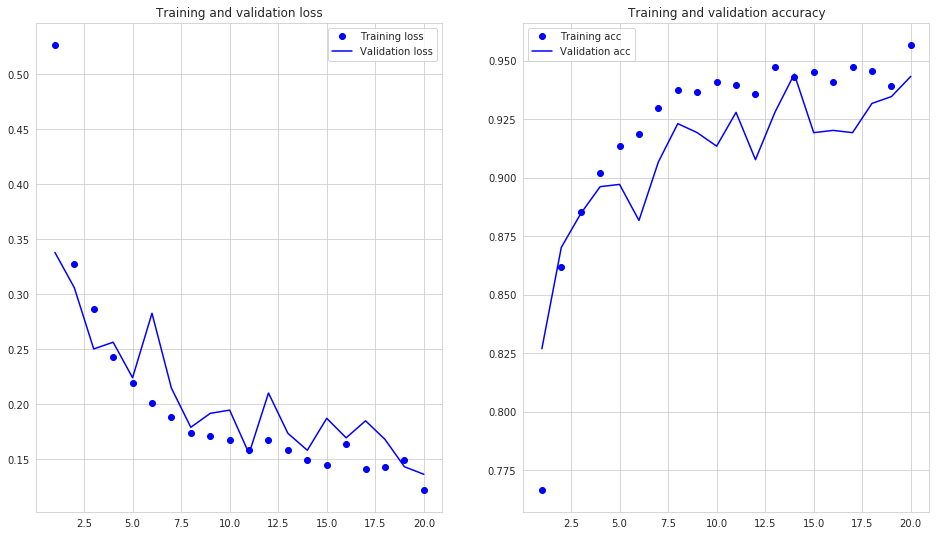

In [316]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


In [317]:
acc = [0] + acc
val_acc = [0] + val_acc
loss = [1] + loss
val_loss = [1] + val_loss

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


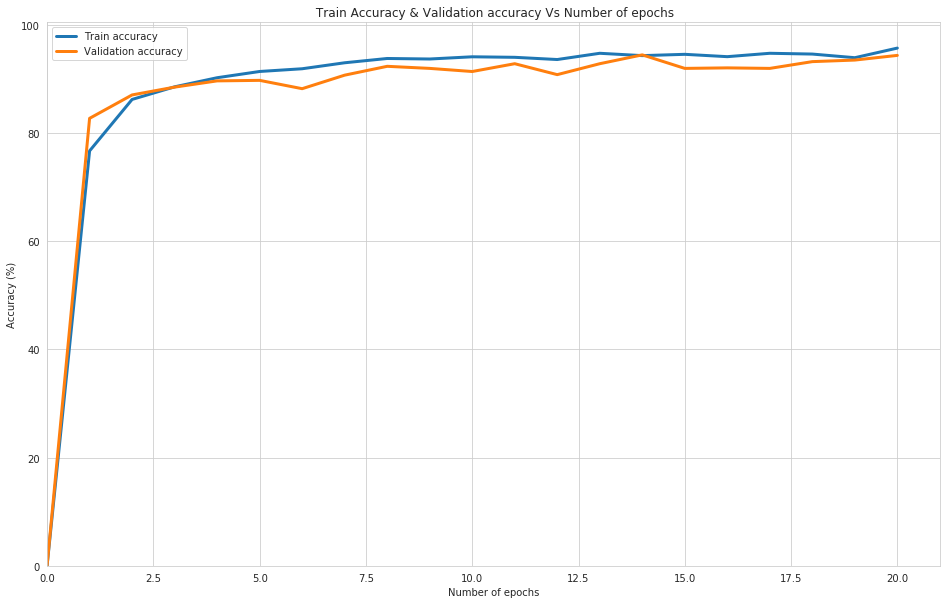

In [318]:
plt.figure(figsize=(16,10)) # we give the shape of the figure
plt.plot(num_epochs, np.dot(acc, 100), label = 'Train accuracy', linewidth=3) # plot the graph (ranks, frequency) of the corpus Gutenberg with stopwords
plt.plot(num_epochs, np.dot(val_acc,100), label = 'Validation accuracy', linewidth=3) # plot the graph (ranks, frequency) of the corpus Gutenberg without stopwords
plt.ylim(ymin=0)
plt.xlabel('Number of epochs') # We give a label to our x Axis
plt.ylabel('Accuracy (%)') # We give a label to our y Axis
plt.title(" Train Accuracy & Validation accuracy Vs Number of epochs") # Give a title to the figure plt.xscale('log') # we use a logarithmic scale for the x axis
plt.xlim(xmin = 0) # we set the x axe to begin from 1
plt.legend() # make a legend for each curves
plt.show() # Show the result
###End

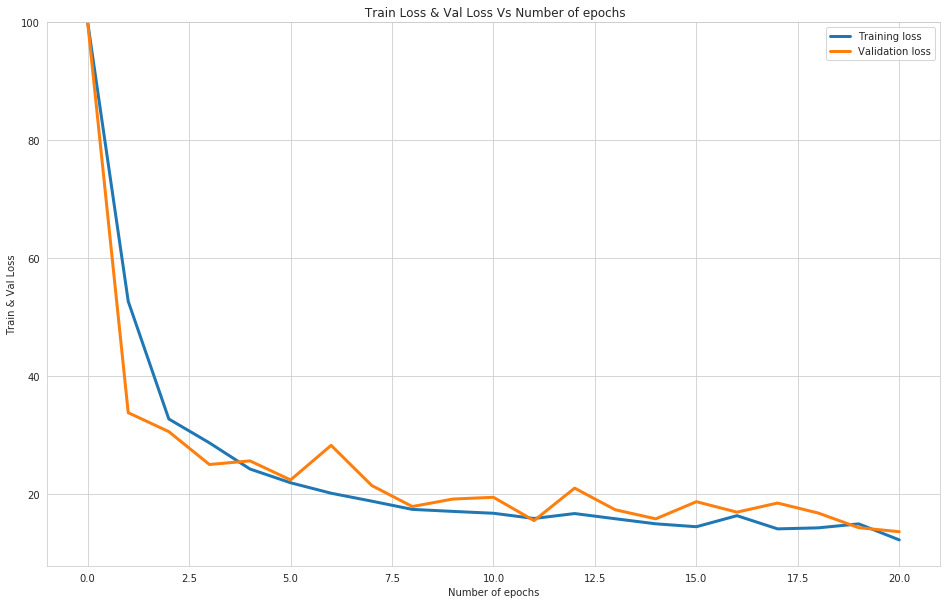

In [320]:
plt.figure(figsize=(16,10)) # we give the shape of the figure
plt.plot(num_epochs, np.dot(loss, 100), label = 'Training loss', linewidth=3) # plot the graph (ranks, frequency) of the corpus Gutenberg with stopwords
plt.plot(num_epochs, np.dot(val_loss, 100), label = 'Validation loss', linewidth=3) # plot the graph (ranks, frequency) of the corpus Gutenberg with stopwords
plt.ylim(ymax=100)
plt.xlabel('Number of epochs') # We give a label to our x Axis
plt.ylabel('Train & Val Loss') # We give a label to our y Axis
plt.title(" Train Loss & Val Loss Vs Number of epochs") # Give a title to the figure plt.xscale('log') # we use a logarithmic scale for the x axis
plt.legend() # make a legend for each curves
plt.show() # Show the result
###End

In [321]:
import glob
from pathlib import Path

normal_cases_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL')
pneumonia_cases_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [266]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 0s 724us/sample - loss: 0.3467 - accuracy: 0.8782
Loss on test set:  0.34665490856441933
Accuracy on test set:  0.8782051


In [322]:
train_set.reset()
pred = []
train_pred = model.predict_generator(train_set)
for x in np.around(train_pred): 
    pred.append(int(x[0]))
train_pred = np.array(pred)
train_classes = train_set.classes[train_set.index_array]

In [323]:
val_set.reset()
pred = []
val_pred = model.predict_generator(val_set)
for x in np.around(val_pred): 
    pred.append(int(x[0]))
val_pred = np.array(pred)
val_classes = val_set.classes[val_set.index_array]

In [324]:
test_set.reset()
pred = []
test_pred = model.predict_generator(test_set)
for x in np.around(test_pred): 
    pred.append(int(x[0]))
test_pred = np.array(pred)
test_classes = test_set.classes[test_set.index_array]

In [290]:
np.sum(Y_pred == classes)/len(Y_pred)

0.9242569511025887

In [325]:
print('the classification report for the training dataset is : ')
print(classification_report(train_classes, train_pred))

the classification report for the training dataset is : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1073
           1       0.98      0.97      0.97      3100

    accuracy                           0.96      4173
   macro avg       0.94      0.95      0.95      4173
weighted avg       0.96      0.96      0.96      4173



In [326]:
print('the classification report for the validation dataset is : ')
print(classification_report(val_classes, val_pred))

the classification report for the validation dataset is : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       268
           1       0.98      0.94      0.96       775

    accuracy                           0.94      1043
   macro avg       0.91      0.94      0.92      1043
weighted avg       0.94      0.94      0.94      1043



In [327]:
print('the classification report for the test dataset is : ')
print(classification_report(test_classes, test_pred))

the classification report for the test dataset is : 
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       234
           1       0.88      0.99      0.93       390

    accuracy                           0.91       624
   macro avg       0.93      0.88      0.90       624
weighted avg       0.91      0.91      0.90       624



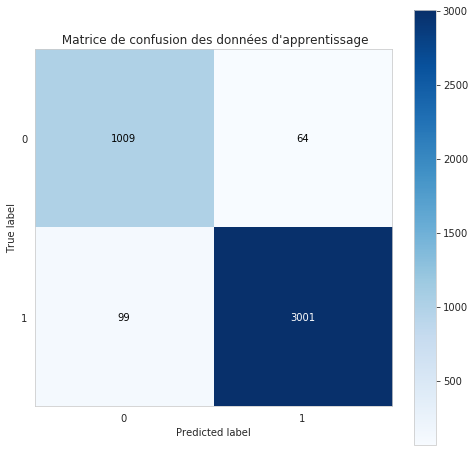

In [328]:
skplt.metrics.plot_confusion_matrix(train_classes, train_pred, figsize=(8,8))
plt.title(" Matrice de confusion des données d'apprentissage")
plt.show()

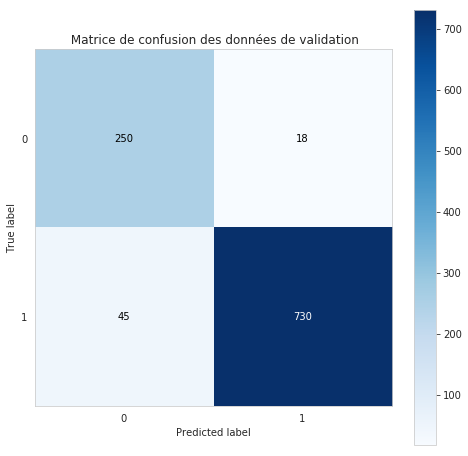

In [329]:
skplt.metrics.plot_confusion_matrix(val_classes, val_pred, figsize=(8,8))
plt.title(" Matrice de confusion des données de validation")
plt.show()

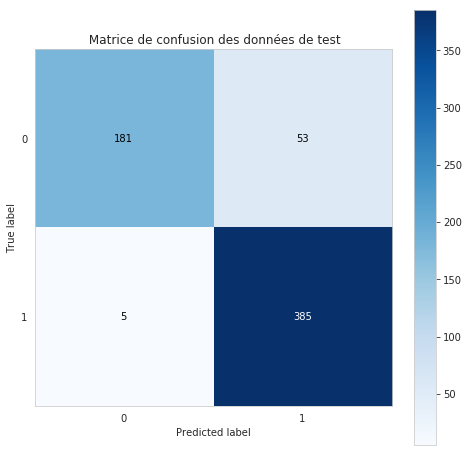

In [330]:
skplt.metrics.plot_confusion_matrix(test_classes, test_pred, figsize=(8,8))
plt.title(" Matrice de confusion des données de test")
plt.show()

In [332]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 34, 34, 64)       